In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Q4

In [53]:
img = cv2.imread('images/image3.png')
imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# imgGry=cv2.GaussianBlur(imgGry,(3,3),0)
ret, thrash = cv2.threshold(imgGry, 240 , 255, cv2.CHAIN_APPROX_NONE)
contours , hierarchy = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

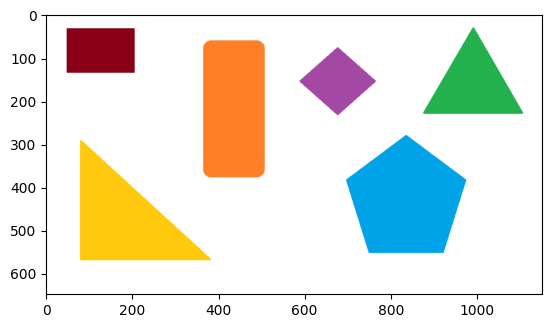

In [54]:
plt.imshow(img[:,:,::-1])

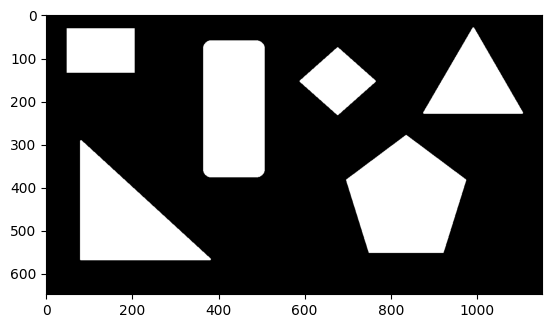

In [55]:
plt.imshow(thrash,cmap='gray')

In [8]:
contour = contours[1]
approx=cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)

In [15]:
approx

array([[[171, 480]],

       [[102, 549]],

       [[133, 636]],

       [[246, 658]],

       [[315, 587]],

       [[317, 567]],

       [[278, 492]]], dtype=int32)

In [61]:
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3:
        cv2.putText( img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
    elif len(approx) == 4 :
        x, y , w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        print(aspectRatio)
        if aspectRatio >= 0.95 and aspectRatio < 1.05:
            cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

        else:
            cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

    elif len(approx) == 5 :
        cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10 :
        cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else:
        cv2.putText(img, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

1.6814814814814816
1.0


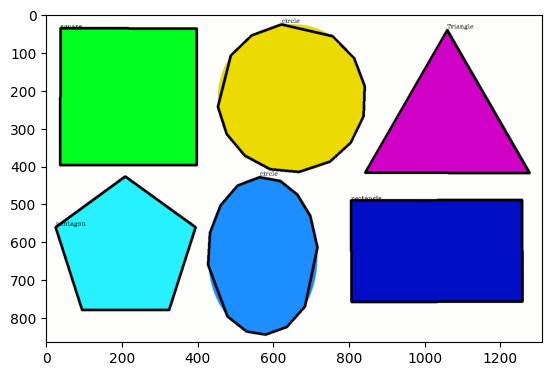

In [62]:
plt.imshow(img)

In [56]:
i=0
max1=-1
max2=-2

max1_cx, max1_cy=0,0
max2_cx, max2_cy=0,0
for contour in contours: 
  
    # here we are ignoring first counter because  
    # findcontour function detects whole image as shape 
    # if i == 0: 
    #     i = 1
    #     continue

    ar=cv2.contourArea(contour)

    
  
    # cv2.approxPloyDP() function to approximate the shape 
    approx = cv2.approxPolyDP( 
        contour, 0.01 * cv2.arcLength(contour, True), True) 
      
    # using drawContours() function 
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5) 
  
    # finding center point of shape 
    M = cv2.moments(contour) 
    if M['m00'] != 0.0: 
        x = int(M['m10']/M['m00']) 
        y = int(M['m01']/M['m00']) 

    if ar>max1:
        max1=ar;max2=max1
        max2_cx,max2_cy=max1_cx,max1_cy
        max1_cx,max1_cy=x,y
    elif ar<max1 and ar>max2:
        max2=ar;max2_cx,max2_cy=x,y
    # putting shape name at center of each shape 
    if len(approx) == 3: 
        cv2.putText(img, 'Triangle', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
  
    # elif len(approx) == 4: 
    #     cv2.putText(img, 'Quadrilateral', (x, y), 
    #                 cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
    elif len(approx) == 4 :
        _,_ , w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        print(aspectRatio)
        if aspectRatio >= 0.95 and aspectRatio < 1.05:
            cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255),2)
        else: cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255),2)
  
    elif len(approx) == 5: 
        cv2.putText(img, 'Pentagon', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
  
    elif len(approx) == 6: 
        cv2.putText(img, 'Hexagon', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
    elif len(approx)==7:
        cv2.putText(img, 'Heptagon', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
    elif len(approx)==8:
        cv2.putText(img, 'Octagon', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
    elif len(approx)==9:
        cv2.putText(img, 'Nonagon', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        
  
    else: 
        cv2.putText(img, 'circle', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

cv2.putText(img,'largest1',(max1_cx,max1_cy-15),cv2.FONT_HERSHEY_SIMPLEX, 0.6,(255,255,255),2)
cv2.putText(img,'largest2',(max2_cx,max2_cy-15),cv2.FONT_HERSHEY_SIMPLEX, 0.6,(255,255,255),2)

1.127388535031847
1.5339805825242718


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

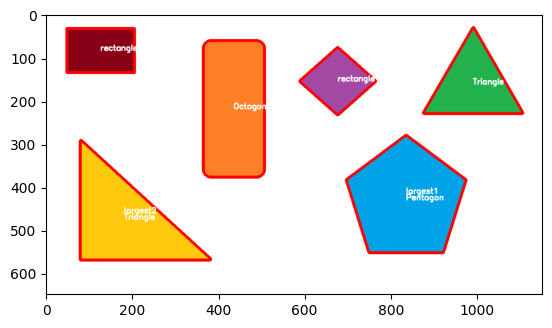

In [57]:
plt.imshow(img[:,:,::-1])

## Q3

In [5]:
# Read image in OpenCV
img = cv2.imread("images/shapes4.jpg")
# blur = cv2.GaussianBlur(img,(5,5),0)
# img = cv2.resize(img, (640, 480))
# Make a copy to draw contour outline
input_image_cpy = img.copy()

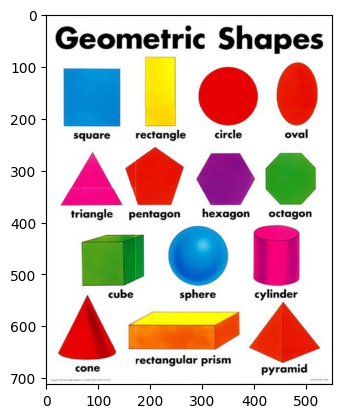

In [6]:
plt.imshow(img[:,:,::-1])
plt.show()

In [7]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [8]:
# define range of red color in HSV
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

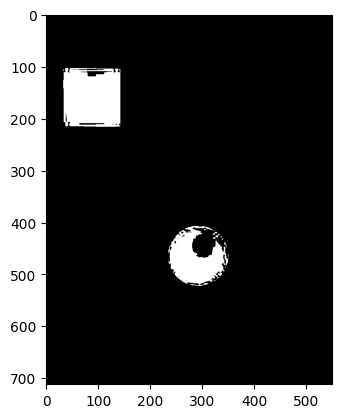

In [9]:
mask_red = cv2.inRange(hsv, lower_blue, upper_blue)
plt.imshow(mask_red,cmap='gray')

In [14]:
contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw detected contour in input image
contour_red_cap = cv2.drawContours(input_image_cpy, contours_red, -1, (255, 0, 255), 3)

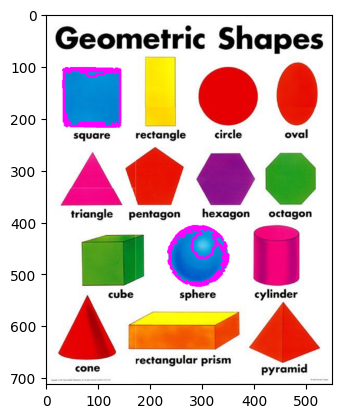

In [15]:
plt.imshow(input_image_cpy[:,:,::-1])

## Q2

In [15]:
image = cv2.imread('images/chessdiag.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,160,apertureSize=3)

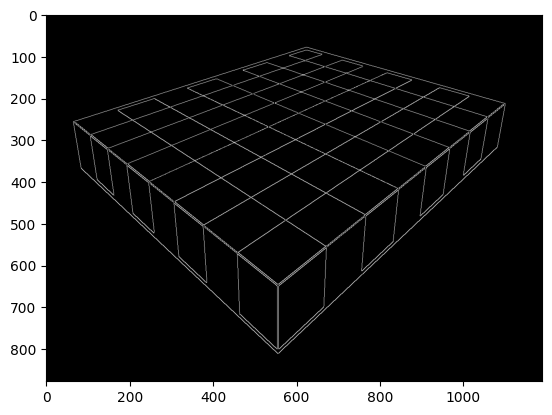

In [16]:
plt.imshow(edges,cmap='gray')

In [17]:
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
 
# The below for loop runs till r and theta values
# are in the range of the 2d array
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    # Stores the value of cos(theta) in a
    a = np.cos(theta)
 
    # Stores the value of sin(theta) in b
    b = np.sin(theta)
 
    # x0 stores the value rcos(theta)
    x0 = a*r
 
    # y0 stores the value rsin(theta)
    y0 = b*r
 
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))
 
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))
 
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))
 
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))
 
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

In [86]:
# Apply HoughLinesP method to 
# to directly obtain line end points
lines_list =[]
lines = cv2.HoughLinesP(
			edges, # Input edge image
			1, # Distance resolution in pixels
			np.pi/180, # Angle resolution in radians
			threshold=50, # Min number of votes for valid line
			minLineLength=5, # Min allowed length of line
			maxLineGap=10 # Max allowed gap between line for joining them
			)

# Iterate over points
for points in lines:
	# Extracted points nested in the list
	x1,y1,x2,y2=points[0]
	# Draw the lines joing the points
	# On the original image
	cv2.line(image,(x1,y1),(x2,y2),(0,255,0),4)
	# Maintain a simples lookup list for points
	lines_list.append([(x1,y1),(x2,y2)])
	

(-0.5, 1188.5, 877.5, -0.5)

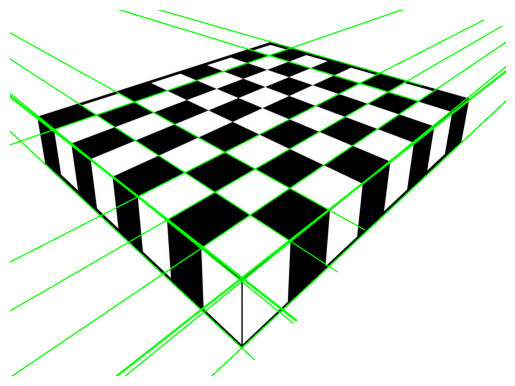

In [18]:
plt.imshow(image[:,:,::-1])
plt.axis('off')